In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re

plt.style.use('fivethirtyeight')

In [89]:
#!pip install wordcloud

In [90]:
ConsumerKey = 'lf2AQxyVrSGLQJOfPHX0a9s80'
ConsumerSecret = 'pE2mqHt6RbeKgGAFQL6w29L5er5TzMmx5n6n7uQ3bALHdfliQz'
AccessToken = '2825222339-0rb3hoM09tPuEd2A7ssTOQXxJPxkUMo3nRyLUPJ'
AccessTokenSecret = 'b7x7NNHNqSN9iVJs5S6g2xhLNJriZs3RNcGnojZooOA6z'

In [91]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)

#Set access token and access token secret
authenticate.set_access_token(AccessToken, AccessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [92]:
#Extract 100 tweets from the twitter user
#posts = api.user_timeline(screen_name= "BillGates", count= 100, lang="en", tweet_mode= "extended")

In [220]:
data = pd.read_csv("google_maps_resturant_review.csv")
data[:3]

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere


In [125]:
data.shape

(1100, 6)

In [127]:
data.isnull().sum()

business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [204]:
data[:2]

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,we went to marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,during my holiday in marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu


In [178]:
data.text[4]

"I don't know what you will look for in terms of price performance point; taste; but yigit restaurant writes a big plus for those who come to work in this region."

In [194]:
#Create a function to clean text
def CleanText(text):
    text = re.sub('[^A-Za-z ]', '', str(text))  #Remove non alphabetic characters except whitespaces
    text = text.lower()                    #Convert to lowercase
    return text

In [166]:
import re

def Clean(text):
    text = re.sub('[^A-Za-z ]', '', text)  # Remove non-alphabetic characters except spaces
    text = text.lower()                    # Convert to lowercase
    return text

# Example usage:
original_text = "Hello, World! This is a test."
cleaned_text = Clean(original_text)
print(cleaned_text)

hello world this is a test


In [221]:
#Clean the the text
data.text = data.text.apply(CleanText)
data.text[4]

'i dont know what you will look for in terms of price performance point taste but yigit restaurant writes a big plus for those who come to work in this region'

In [265]:
#Show the cleaned text
data[:3]

,business_name,author_name,text,photo,rating,rating_category,subjectivity,polarity,analysis
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,we went to marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,0.700000,0.026190,positive
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,during my holiday in marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,0.660417,0.164583,positive
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,prices are very affordable the menu in the pho...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,0.700000,0.275000,positive


In [223]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    

#Create a function to get the polarity    
def getPolarity(text):
    return TextBlob(text).sentiment.polarity                #The polarity tells how positive or negative a text is

#TextBlob(text): TextBlob is a library in Python that provides simple API for diving into common natural language processing (NLP) tasks. It can be used to analyze text for various NLP properties, including sentiment analysis. TextBlob(text) creates a TextBlob object from the input text.

.sentiment: The sentiment attribute of a TextBlob object calculates the sentiment of the text. Sentiment analysis involves determining the emotional tone of a piece of text. It typically provides two values: polarity and subjectivity.

.subjectivity: The subjectivity attribute of the sentiment analysis result indicates how subjective or objective the text is. It's a value between 0 and 1, where 0 represents highly objective (factual) text, and 1 represents highly subjective (opinion-based) text. A subjectivity score closer to 1 means that the text contains more opinions, while a score closer to 0 means the text is more objective.

In [224]:
#Create two new columns for the sentiments 
data["subjectivity"] = data["text"].apply(getSubjectivity)
data["polarity"] = data["text"].apply(getPolarity)


In [225]:
#Show the new dataframe with the new columns
data[:3]

,business_name,author_name,text,photo,rating,rating_category,subjectivity,polarity
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,we went to marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,0.700000,0.026190
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,during my holiday in marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,0.660417,0.164583
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,prices are very affordable the menu in the pho...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,0.700000,0.275000


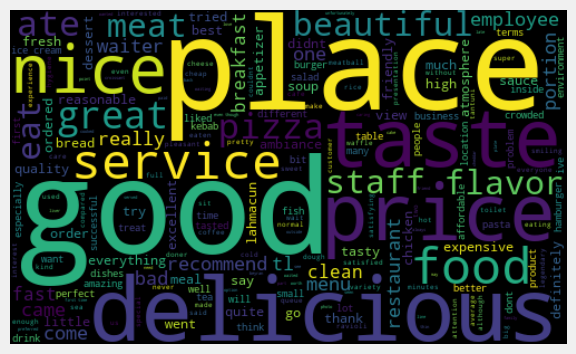

In [216]:
#Plot the wordcloud
allwords = " ".join([txt for txt in data.text])

wordcloud= WordCloud(width= 500, height= 300, 
                     random_state= 21, 
                     max_font_size= 119).generate(allwords)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [272]:
#Create a function to compute the negative, neutral and positive
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data["analysis"]= data.polarity.apply(getAnalysis)

#show the dataframe
data[:2]

,business_name,author_name,text,photo,rating,rating_category,subjectivity,polarity,analysis
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,we went to marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,0.700000,0.026190,Positive
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,during my holiday in marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,0.660417,0.164583,Positive


In [273]:
#Print all the positive texts
j= 1
sortedDF = data.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['text'][i])
        j = j+1

1) we went to marmaris with my wife for a holiday we chose this restaurant as a place for dinner based on the reviews and because we wanted juicy food when we first went there was a serious queue you proceed by taking the food you want in the form of an open buffet both vegetable dishes and meat dishes were plentiful there was also dessert for those who wanted it after you get what you want you pay at the cashier they dont go through cards they work in cash there was a lot of food variety and the food prices were unbelievably cheap we paid only  tl for all the meals here it included buttermilk and bread but unfortunately i cant say its too clean as a place
2) during my holiday in marmaris we ate here to fit the food its really good that the food is cheap and nice eating as much bread as you want is a big plus for those who are not satisfied without bread it is a place that i can recommend to those who will go to marmaris on july  there was a small increase but even the price hike is ch

In [274]:
#Print all the negative texts
j = 1
sortedDF = data.sort_values(by=['polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF["analysis"][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF["text"][i])
        print()
        j= j+1

1) the ambiance of the place is nice when we went there was a lot of queue and after waiting for a while they took our place the friend who took our order said half a half pizza and we preferred half chicken and half steak two people were easily satisfied a lot of patterns

2) flavor  it has nothing but dough taste labor  not befitting a touristic place service  there was no wet wipes and napkins on the table but there was no sympathetic family to say this service and this taste were not available at this price

3) the pizza is big enough for  people the dough is very thin price is between  tl

4) without any taste how they are at the first rank we ate cafe inn pizza it was  tl

5) it is a very very expensive place it took  minutes for  drinks to arrive

6) the sushi was too small so it was not possible to taste the ingredients the rice was overcooked and lacked flavor it was missing except for the tail of the shrimp

7) it was very expensive but taste wasnt bad

8) if you come to ante

Text(0, 0.5, 'Subjectivity')

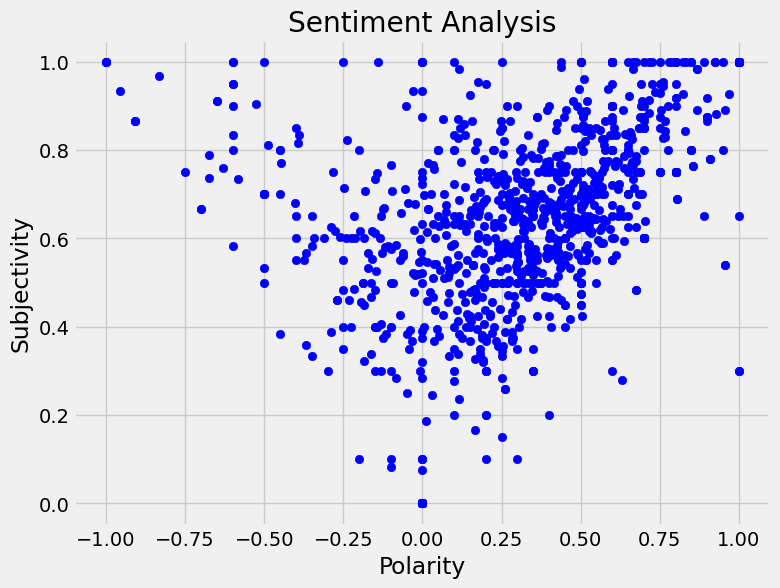

In [246]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
    plt.scatter(data.polarity[i], data.subjectivity[i], color='blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

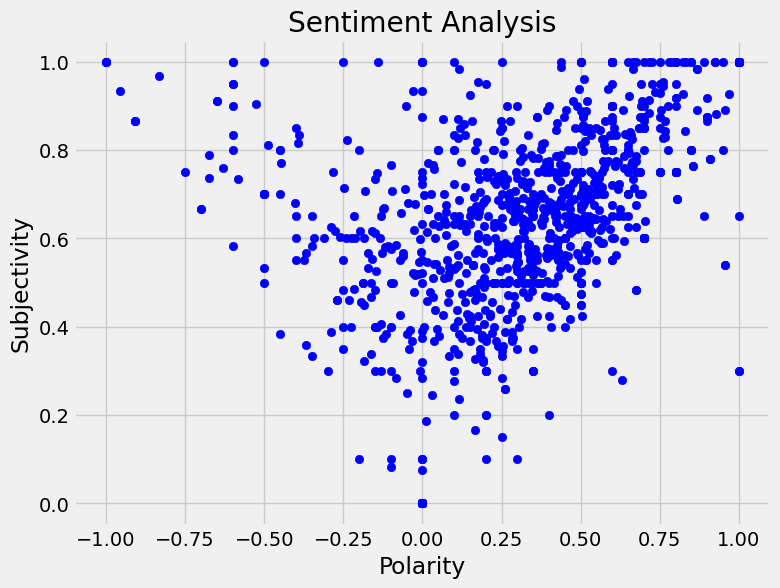

In [247]:
plt.figure(figsize=(8,6))
plt.scatter(data.polarity, data.subjectivity, color='blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [275]:
#Get the percentage of positive text
ptexts = data[data.analysis == 'Positive']
ptexts = ptexts.text
round(ptexts.shape[0]/data.shape[0] *100, 1)

80.7

In [276]:
#Get the percentage of positive text
ntexts = data[data.analysis == 'Negative']
ntexts = ntexts.text
round(ntexts.shape[0]/data.shape[0] *100, 1)

14.3

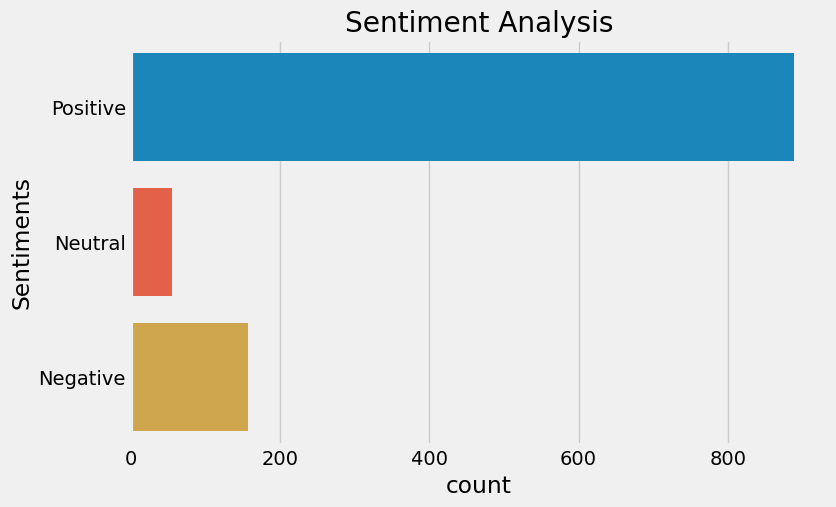

In [282]:
#Show the value counts
analysis_count = data.analysis.value_counts()
analysis_count

plt.figure(figsize=(8, 5))
sns.countplot(y=data.analysis)
plt.title("Sentiment Analysis")
plt.xlabel("count")
plt.ylabel("Sentiments")
plt.show()

In [199]:
import json
path= "example.txt"
data2 = [json.loads(line) for line in open(path)]
data2 = pd.DataFrame(data2)
data2.a[5]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [202]:
data2.a = data2.a.apply(CleanText)
data2.a[5]

'mozilla windows nt  wow applewebkit khtml like gecko chrome safari'

In [229]:
data3 = pd.read_csv("restaurant_review_in dhaka.csv")
data3

,Review Text,Review,Recommends
0,"Friendly staff, good food and homely environme...",NaN,True
1,Well...The Food was Good___Intrerior design is...,NaN,True
2,The man who is foodie like me for him arabian ...,5.0,NaN
3,ordered pizza and they were unable to serve th...,NaN,False
4,This place is too much comfortable & food is d...,4.0,NaN
...,...,...,...
16592,Firstly their ac didn't work just useless and ...,1.0,NaN
16593,good food with good environment,NaN,True
16594,Best Thai soup of the town,5.0,NaN
16595,really nice place with so many good ppls.,NaN,True


In [228]:
data3.shape

(16597, 3)

In [230]:
data3.isnull().sum()

Review Text        0
Review          1919
Recommends     14679
dtype: int64

In [ ]:
data = pd.read_csv("google_maps_resturant_review.csv")